In [1]:
# important libraries
import pandas as pd
import numpy as np
from collections import Counter

# to split into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# for Viz
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# wordcloud viz and additional stopwords
from wordcloud import WordCloud, STOPWORDS

# for process_text
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# sklearn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# load dataset

data = pd.read_csv("movie.csv")

In [3]:
data.head(3)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0


In [4]:
data.head(2)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0


In [5]:
# get stopwords from nltk and add to STOPWORDS from wordcloud

stopwords_wc = set(STOPWORDS)
print("stopwords from wordloud lib count:", len(set(stopwords_wc)))
stopwords_nltk = stopwords.words('english')
print("stopwords from nltk count:", len(set(stopwords_nltk)))

# append both
for sw in stopwords_nltk:
    stopwords_wc.add(sw);
    
stopwords = stopwords_wc

# stopwords.update(["goo"]) # only to update with custom_stopwords
print("stopwords combined count:", len(set(stopwords)))

stopwords from wordloud lib count: 192
stopwords from nltk count: 179
stopwords combined count: 227


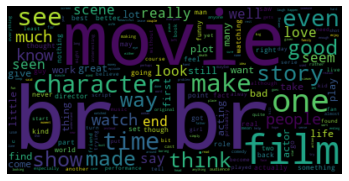

In [6]:
# show popular words from all reviwes

textt = " ".join(review for review in data.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

In [7]:
# split to positive and negative sets

all_positive_reviws = data[data.label == 1]
all_negative_reviws = data[data.label == 0]

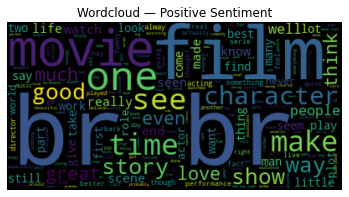

In [8]:
# Wordcloud — Positive Sentiment

pos = " ".join(review for review in all_positive_reviws.text)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud — Positive Sentiment')
plt.show()

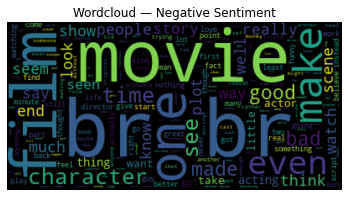

In [9]:
# Wordcloud — negitive Sentiment

neg = " ".join(review for review in all_negative_reviws.text)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud — Negative Sentiment')
plt.show()

In [6]:
# update stopwords with service, food, place since they wont have pos or negative meanings

stopwords.update(["br", "movie", "film", "one", "time", "character", "make", "see"])
len(stopwords)

235

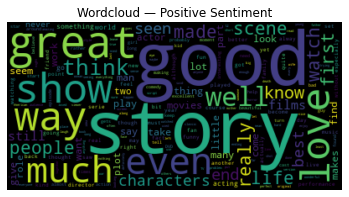

In [17]:
# Wordcloud — Positive Sentiment

pos = " ".join(review for review in all_positive_reviws.text)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud — Positive Sentiment')
plt.show()

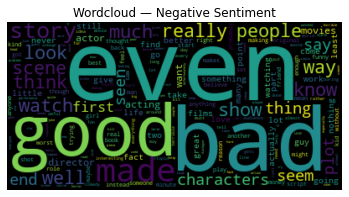

In [18]:
# Wordcloud — negitive Sentiment

neg = " ".join(review for review in all_negative_reviws.text)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud — Negative Sentiment')
plt.show()

In [19]:
# check text before pre-processing

print("text before pre-processing:")
data.text[2]

text before pre-processing:


'Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with the Titanic sinking and you\'ve got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. Is this what kids who were too young to be allowed to go to Woodstock and who failed grade school composition do? "I\'ll show those old meanies, I\'ll put out my own movie and prove that you don\'t have to know nuttin about your topic to still make money!" Yeah, we already know that. The one thing watching this film did for me was to give me a little insight into underclass thinking. The next time I see a slut in a bar who looks like Diane Lane, I\'m running the other way. It\'s child abuse to let parents that worthless raise kids. It\'s audience abuse to simply stick Woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969.'

In [8]:
## pre-processing text (cleaning text)

# remove punctuation
def remove_punctuation(text):
    final = "".join(u for u in text if u not in string.punctuation)
    return final

data.text = data.text.apply(remove_punctuation)

# remove stopwords
def remove_stopwords(text):
    tokens = text.split(" ")
    tokens_filtered= [word for word in tokens if not word in stopwords]
    return (" ").join(tokens_filtered)

data.text = data.text.apply(remove_stopwords)


# remove numbers
def remove_numbers(text):
    final = "".join(u for u in text if u not in string.digits)
    return final

data.text = data.text.apply(remove_numbers)

In [22]:
# check text after pre-processing

print("text after pre-processing:")
data.text[2]

text after pre-processing:


'Why people know particular past feel need try define others Replace Woodstock Civil War Apollo moonlanding Titanic sinking youve got realistic flick formulaic soap opera populated entirely lowlife trash Is kids young allowed go Woodstock failed grade school composition Ill show old meanies Ill put prove dont know nuttin topic still money Yeah already know The thing watching give little insight underclass thinking The next I slut bar looks Diane Lane Im running way Its child abuse let parents worthless raise kids Its audience abuse simply stick Woodstock moonlanding flick ipso facto means portrays '

<8000x136838 sparse matrix of type '<class 'numpy.int64'>'
	with 791576 stored elements in Compressed Sparse Row format>

In [139]:
from sklearn.pipeline import Pipeline


# split data set to train and test

corpus_train, corpus_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.2, random_state=7)

# #Creating a Pipeline
model = Pipeline(steps =[
('preprocessing', CountVectorizer(token_pattern=r'\b\w+\b')),
('classifier', LogisticRegression(dual=False,max_iter=2000, penalty="l2", C=0.1))
])


# Create a bag of words: vectorizer

# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# # vectorizer = TfidfVectorizer(min_df= 10, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# # vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(corpus_train)
# X_test = vectorizer.transform(corpus_test)

In [140]:
# Logistic Regression

# define model
# model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
X_train = corpus_train
X_test = corpus_test

# fit model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', LogisticRegression(C=0.1, max_iter=2000))])

In [141]:
# predict using LR model

predictions = model.predict(X_test)

In [142]:
# test model and get accuracy

new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3984
           1       0.90      0.89      0.89      4016

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



###### Accuracy is 89% not bad for a baseline model

In [128]:
# Predict one review (unseen madeup review)


review = ['I loved this movie. the acting was really good!!']
print('Org text: ', review)

review_clean = remove_punctuation(str(review))
print('Clean text: ', review_clean)

y_pred = model.predict([review_clean])

print("Predicition is :", np.where(y_pred==1, 'Positive Review', 'Negative Review'))

Org text:  ['I loved this movie. the acting was really good!!']
Clean text:  I loved this movie the acting was really good
Predicition is : ['Positive Review']


In [129]:
# Predict one review (unseen madeup review)


review = ["I'm not a fan of this film. Disappointed was not as I expected!"]
print('Org text: ', review)

review_clean = remove_punctuation(str(review))
print('Clean text: ', review_clean)

y_pred = model.predict([review_clean])

print("Predicition is :", np.where(y_pred==1, 'Positive Review', 'Negative Review'))

Org text:  ["I'm not a fan of this film. Disappointed was not as I expected!"]
Clean text:  Im not a fan of this film Disappointed was not as I expected
Predicition is : ['Negative Review']


In [130]:
# Predict multiple reviews

reviews = [
     'This is a ridiculously bright movie. An eye-opening with great ending!',
     'I hate this film. so boring',
     'This is an ok movie. I wish they had more drama in it',
     'I was happy with this ending. It is my favorite one this year'
]

In [131]:
reviews

['This is a ridiculously bright movie. An eye-opening with great ending!',
 'I hate this film. so boring',
 'This is an ok movie. I wish they had more drama in it',
 'I was happy with this ending. It is my favorite one this year']

In [134]:
for review in reviews:
    
    print(review)
    review_clean = remove_punctuation(str(review))
    y_pred = model.predict([review_clean])
    print("Predicition is :", np.where(y_pred==1, 'Positive Review', 'Negative Review'))

This is a ridiculously bright movie. An eye-opening with great ending!
Predicition is : ['Positive Review']
I hate this film. so boring
Predicition is : ['Negative Review']
This is an ok movie. I wish they had more drama in it
Predicition is : ['Negative Review']
I was happy with this ending. It is my favorite one this year
Predicition is : ['Positive Review']


In [9]:
# explaining the model with SHAP

import shap

shap.initjs()


# get sample of the big data to use SHAP 

short_data = data.sample(frac=0.4)
short_data = short_data.reset_index()

# preprocess data
short_data.text = short_data.text.apply(remove_punctuation)
short_data.text = short_data.text.apply(remove_stopwords)
short_data.text = short_data.text.apply(remove_numbers)

# split data
corpus_train, corpus_test, y_train, y_test = train_test_split(short_data.text, short_data.label
                                                              , test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

lr = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)

#### Summarize the effect of all the features

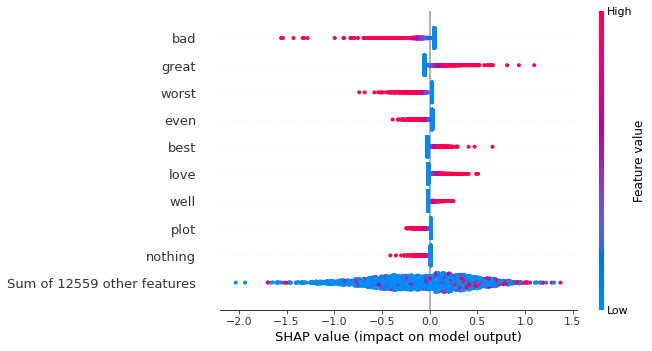

In [10]:
shap.plots.beeswarm(shap_values)

In [13]:
#### Explain the first review

ind = 0
shap.plots.force(shap_values[ind])

In [14]:
print("Positive" if list(y_test)[ind] else "Negative", "Review:")
print(list(corpus_test)[ind])

Positive Review:
Came across recently long hearing It excellent pretentious people loves noir literature films Not camp humorous GREAT CAST From magnificent Carla Gugino Emma Thompson German superstar Til Schweiger feast eyes Alan Rickman funny antagonist gang Would love spin Emma Thompson solving cases arguments much Tracy Hepburn etcbr Intelligent story nice twists scope photography dont watch unless scope compositions richbr Sexy sexy sexy fun timebr Best use Just Like Heaven The Cure must believebr 


In [15]:
def review_prediction(ind):
    print("Positive" if list(y_test)[ind] else "Negative", "Review:")
    print(list(corpus_test)[ind])
    
def pred_explainer(ind):
    ex = shap.plots.force(shap_values[ind])
    return ex

In [16]:
review_prediction(6)

Negative Review:
This flash soul The actors put lot passion numbers numbers often didnt connect felt standalone music videos And effort made numbers sound happening right front every single sounds coming studio essentially sucking life songs Off stage performances dull unrealized especially Hudson essentially plays angry strong shes stubborn selfish black woman weve seen There absolutely depth female leads Though I think wants us believe Hudsons faces hardship weight really refusal whats best team lands trouble making end totally meaningless Hudsons Academy Award joke justification When sang put forth emotion though often misplaced writerdirectors fault acting nothing flesh already underwritten Eddie Murphys arc fine job still Oscar worthy The actor really brought something roll Danny Glover took small relatively unimportant made something real There nothing sink teeth drama heart even laughs The placement musical numbers bad times almost seemed making fun musicals instead number Hudso

In [17]:
pred_explainer(6)

In [35]:
review_prediction(9)

Positive Review:
Despite reviews distinctly Lukewarm I found story totally engrossing even critics described love story Mills Boon It good warm touching story real love cynical times Many audience sniffing surreptitiously dabbing eyes You really believe young Victoria Albert passionately fond even though political reasons arranged marriage I feel though Sir John Conroy desperate control young Queen perhaps played pantomime villain As rumoured fact real father Victoria result affair mother The Duchess Kent interesting explore theory Emily Blunt totally convincing young Princess trapped stifling palace courtiers politicians manipulate She brilliantly portrays strength determination eventually made Victoria great Queen England prospered never long reign I believe word mouth recommendations ensure great success enjoyable wonderful looking


In [36]:
pred_explainer(9)

In [39]:
review_prediction(11)

Negative Review:
When I first watch series impression I got characters charming funny Lorelai Rory particular witty intelligent conversationalist albeit bit talkative After watching opinion changedbr The main characters slowly revealed selfcentered selfobsessed narcissists treated tiny wounds pride worst insults existence For example Rory wouldnt speak mother months Lorelai didnt consult impulsive marriage Lorelai dumped Luke simply wanting little adjust new life circumstances These people shallow center universe everyone behave exactly according rigid rules dont hold grudges eternity They dont want peoples problems treat smallest slight gravest offence Most characters appear lack ability behave grownup way They think whatever wanted everyone damnedbr The series characterbased main characters became unlikeable show became impossible watch I still rest series I doubt I finish watching I hold anyone think highly show awful characters greatest suspicion  must horrid Lorelai et al


In [40]:
pred_explainer(11)